In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from scipy import stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


In [2]:
df = pd.read_csv(r"data/tumanova.csv")

In [3]:
df

,Модель (полное название),Модель процессора,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Тип оперативной памяти,Вид накопителя,Вид графического ускорителя,Количество ядер,Количество потоков,Результа ты в бенчмарке PCMark10
0,Asus ROG Strix GL703GE,Intel Сore i7-8750H,2018,2.2,4.1,8.0,1.0,9,16,2667,DDR4,HDD,Дискретный и встроенный,6,12,3726
1,Lenovo ThinkPad T440,Intel Core i5-4300U,2013,1.9,2.9,5.0,0.5,3,8,1596,DDR3,HDD,Встроенный,2,4,1846
2,Acer Travel Mate P259-MG-39WS,Intel Core i3-6006U,2016,2.0,2.0,4.0,0.5,3,6,2133,DDR4,HDD,Дискретный и встроенный,2,4,1426
3,MacBook Air Mid 2017,Intel Core i7-5650U,2015,2.2,3.2,5.0,0.5,4,8,1600,DDR3,SSD,Встроенный,2,4,2586
4,MacBook Air Mid 2017,Intel Core i5-5350U,2015,1.8,2.9,5.0,0.5,3,8,1600,DDR3,SSD,Встроенный,2,4,2039
5,hp pavilion gaming 15-dk0064ur,Intel Core i5-9300H,2019,2.4,4.1,8.0,1.0,8,8,2666,DDR4,HDD и SSD,Дискретный и встроенный,4,8,3659
6,Lenovo v580c,Intel Core i5-3230M,2013,2.6,3.2,5.0,0.5,3,6,1600,DDR4,HDD,Дискретный и встроенный,2,4,1824
7,Honor Magicbook Pro 4600H,AMD Ryzen 5 4600H,2020,3.0,4.0,6.5,3.0,8,16,2666,DDR4,SSD,Встроенный,6,12,2868
8,Dexp clv-650-sb,Intel Core i5-4210M,2014,2.6,3.2,5.0,0.5,3,8,1600,DDR3,HDD,Дискретный и встроенный,2,4,2561
9,Dell Vostro 5581,Intel Core i5-8265U,2018,1.6,3.9,4.0,1.0,6,8,2666,DDR4,SSD,Встроенный,4,8,3045


In [4]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Модель (полное название)                       30 non-null     object 
 1   Модель процессора                              30 non-null     object 
 2   Год выпуска процессора                         30 non-null     int64  
 3   Тактовая частота процессора(ГГц)               30 non-null     float64
 4   Максимальная тактовая частота процессора(ГГц)  30 non-null     float64
 5   Частота шины процессора(GT/s)                  30 non-null     float64
 6   Объема кэша L2 процессора(Мб)                  30 non-null     float64
 7   Объема кэша L3 процессора(Мб)                  30 non-null     int64  
 8   Объем оперативной памяти (Гб)                  30 non-null     int64  
 9   Частота оперативной памяти (МГц)               30 non-nu

In [6]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [7]:
useless_cols = ['Модель (полное название)', 'Модель процессора']
num_cols = ['Год выпуска процессора','Тактовая частота процессора(ГГц)', 'Максимальная тактовая частота процессора(ГГц)','Частота шины процессора(GT/s)','Объема кэша L2 процессора(Мб)','Объема кэша L3 процессора(Мб)','Объем оперативной памяти (Гб)','Частота оперативной памяти (МГц)','Количество ядер','Количество потоков']
cat_cols = ['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']
label = ['Результа ты в бенчмарке PCMark10']

In [8]:
df[cat_cols].dtypes

Тип оперативной памяти         object
Вид накопителя                 object
Вид графического ускорителя    object
dtype: object

In [9]:
df[num_cols].dtypes

Год выпуска процессора                             int64
Тактовая частота процессора(ГГц)                 float64
Максимальная тактовая частота процессора(ГГц)    float64
Частота шины процессора(GT/s)                    float64
Объема кэша L2 процессора(Мб)                    float64
Объема кэша L3 процессора(Мб)                      int64
Объем оперативной памяти (Гб)                      int64
Частота оперативной памяти (МГц)                   int64
Количество ядер                                    int64
Количество потоков                                 int64
dtype: object

## Номинальные признаки

In [10]:
cat_cols

['Тип оперативной памяти', 'Вид накопителя', 'Вид графического ускорителя']

In [11]:
df['Тип оперативной памяти'] = pd.get_dummies(df['Тип оперативной памяти'])['DDR4']

In [12]:
df['Вид графического ускорителя'] = pd.get_dummies(df['Вид графического ускорителя'])['Дискретный и встроенный']

In [13]:
drive = pd.get_dummies(df['Вид накопителя'])
drive.loc[drive['HDD и SSD']==1, ['HDD', 'SSD']] = 1
drive = drive.drop('HDD и SSD', axis=1)
df.drop('Вид накопителя', axis=1)
cat_df = pd.concat([df[['Тип оперативной памяти', 'Вид графического ускорителя']], drive], axis=1) 

In [14]:
cat_df

,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD
0,1,1,1,0
1,0,0,1,0
2,1,1,1,0
3,0,0,0,1
4,0,0,0,1
5,1,1,1,1
6,1,1,1,0
7,1,0,0,1
8,0,1,1,0
9,1,0,0,1


In [15]:
df.columns

Index(['Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Тип оперативной памяти',
       'Вид накопителя', 'Вид графического ускорителя', 'Количество ядер',
       'Количество потоков', 'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [16]:
data = pd.concat([df[num_cols], cat_df, df[label]], axis=1)

In [17]:
data

,Год выпуска процессора,Тактовая частота процессора(ГГц),Максимальная тактовая частота процессора(ГГц),Частота шины процессора(GT/s),Объема кэша L2 процессора(Мб),Объема кэша L3 процессора(Мб),Объем оперативной памяти (Гб),Частота оперативной памяти (МГц),Количество ядер,Количество потоков,Тип оперативной памяти,Вид графического ускорителя,HDD,SSD,Результа ты в бенчмарке PCMark10
0,2018,2.2,4.1,8.0,1.0,9,16,2667,6,12,1,1,1,0,3726
1,2013,1.9,2.9,5.0,0.5,3,8,1596,2,4,0,0,1,0,1846
2,2016,2.0,2.0,4.0,0.5,3,6,2133,2,4,1,1,1,0,1426
3,2015,2.2,3.2,5.0,0.5,4,8,1600,2,4,0,0,0,1,2586
4,2015,1.8,2.9,5.0,0.5,3,8,1600,2,4,0,0,0,1,2039
5,2019,2.4,4.1,8.0,1.0,8,8,2666,4,8,1,1,1,1,3659
6,2013,2.6,3.2,5.0,0.5,3,6,1600,2,4,1,1,1,0,1824
7,2020,3.0,4.0,6.5,3.0,8,16,2666,6,12,1,0,0,1,2868
8,2014,2.6,3.2,5.0,0.5,3,8,1600,2,4,0,1,1,0,2561
9,2018,1.6,3.9,4.0,1.0,6,8,2666,4,8,1,0,0,1,3045


## Анализ критических значений

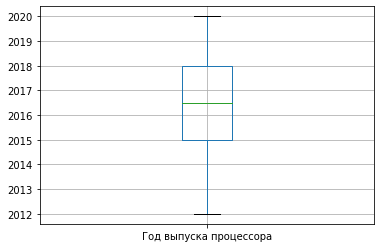

In [18]:
data.boxplot(num_cols[0])
None

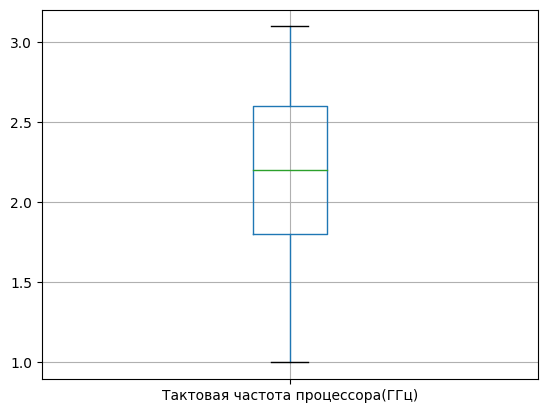

In [19]:
data.boxplot(num_cols[1])
None

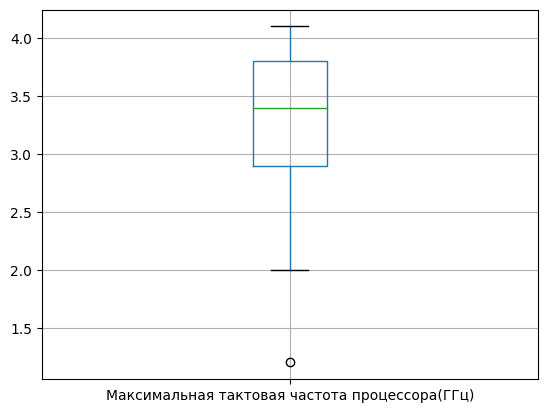

In [20]:
data.boxplot(num_cols[2])
None

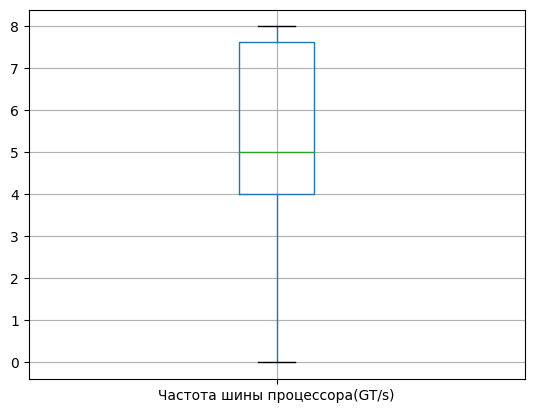

In [21]:
data.boxplot(num_cols[3])
None

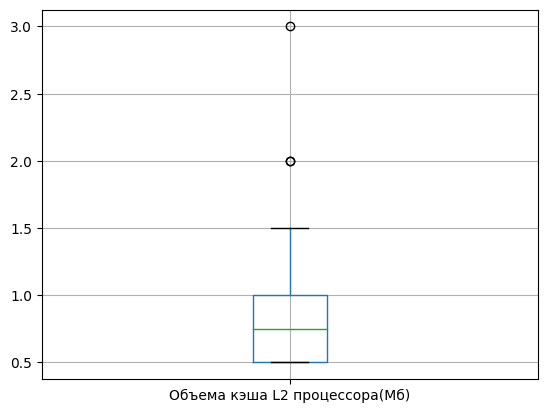

In [22]:
test = data.boxplot(num_cols[4], return_type='dict')
None

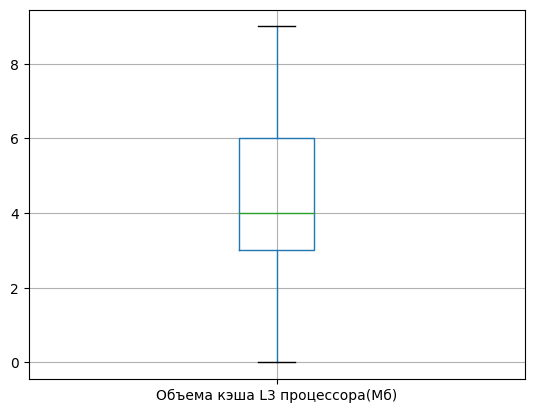

In [23]:
data.boxplot(num_cols[5])
None

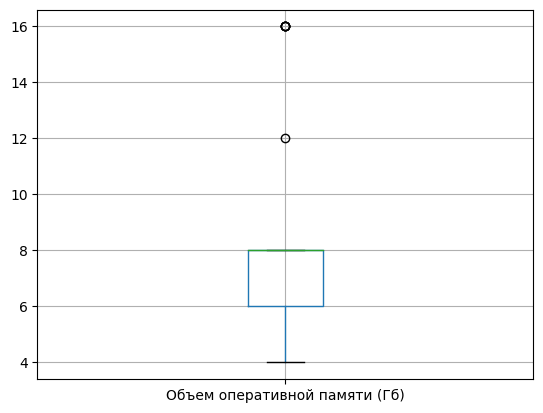

In [24]:
data.boxplot(column=num_cols[6])
None

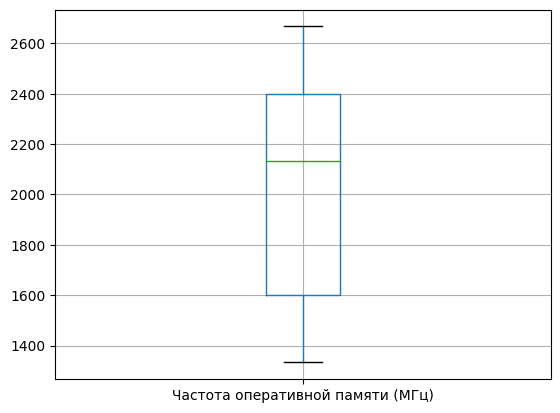

In [25]:
data.boxplot(column=num_cols[7])
None

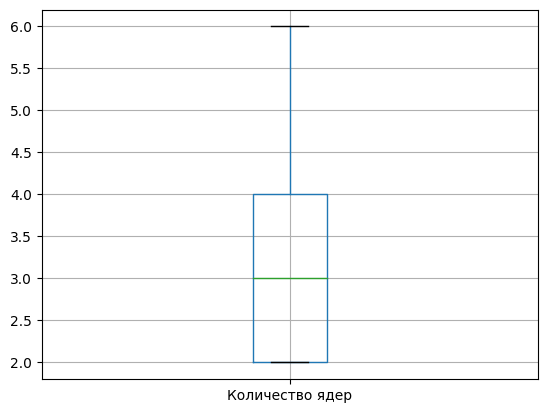

In [26]:
data.boxplot(num_cols[8])
None

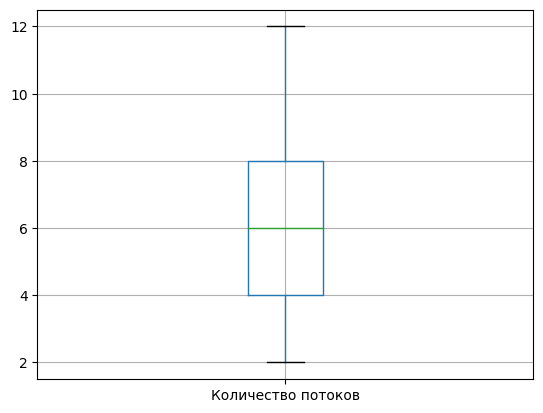

In [27]:
data.boxplot(num_cols[9])
None

In [28]:
def get_outlier(data, num_cols):
    res = {}
    for col in num_cols:
        q75, q25 = np.percentile(data[col], [75, 25])
        intr_qr = q75-q25
        top = q75+(1.5*intr_qr)
        low = q25-(1.5*intr_qr)
        out_arr = [data[data[col] > top].index.tolist()]
        out_arr.append(data[data[col] < low].index.tolist())
        res[col] = out_arr
    return res

In [29]:
get_outlier(data, num_cols)

{'Год выпуска процессора': [[], []],
 'Тактовая частота процессора(ГГц)': [[], []],
 'Максимальная тактовая частота процессора(ГГц)': [[], [27]],
 'Частота шины процессора(GT/s)': [[], []],
 'Объема кэша L2 процессора(Мб)': [[7, 17, 27], []],
 'Объема кэша L3 процессора(Мб)': [[], []],
 'Объем оперативной памяти (Гб)': [[0, 7, 11, 14, 18, 25], []],
 'Частота оперативной памяти (МГц)': [[], []],
 'Количество ядер': [[], []],
 'Количество потоков': [[], []]}

In [30]:
data = data.drop(index=[7])

<AxesSubplot:>

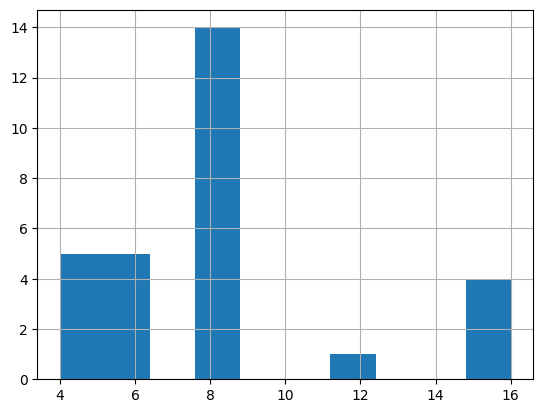

In [31]:
data['Объем оперативной памяти (Гб)'].hist()

In [32]:
data.loc[data['Объема кэша L3 процессора(Мб)'] == 0]['Объема кэша L3 процессора(Мб)']=np.NaN

In [33]:
data.columns

Index(['Год выпуска процессора', 'Тактовая частота процессора(ГГц)',
       'Максимальная тактовая частота процессора(ГГц)',
       'Частота шины процессора(GT/s)', 'Объема кэша L2 процессора(Мб)',
       'Объема кэша L3 процессора(Мб)', 'Объем оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'Количество ядер',
       'Количество потоков', 'Тип оперативной памяти',
       'Вид графического ускорителя', 'HDD', 'SSD',
       'Результа ты в бенчмарке PCMark10'],
      dtype='object')

In [34]:
data = data.loc[(data['Частота шины процессора(GT/s)'] != 0) & (data['Объема кэша L3 процессора(Мб)'] != 0)]

In [35]:
num_cols

['Год выпуска процессора',
 'Тактовая частота процессора(ГГц)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Частота шины процессора(GT/s)',
 'Объема кэша L2 процессора(Мб)',
 'Объема кэша L3 процессора(Мб)',
 'Объем оперативной памяти (Гб)',
 'Частота оперативной памяти (МГц)',
 'Количество ядер',
 'Количество потоков']

In [36]:
data['Объем оперативной памяти (Гб)'] = (data['Объем оперативной памяти (Гб)'] // 8 > 0).astype(int)

<AxesSubplot:>

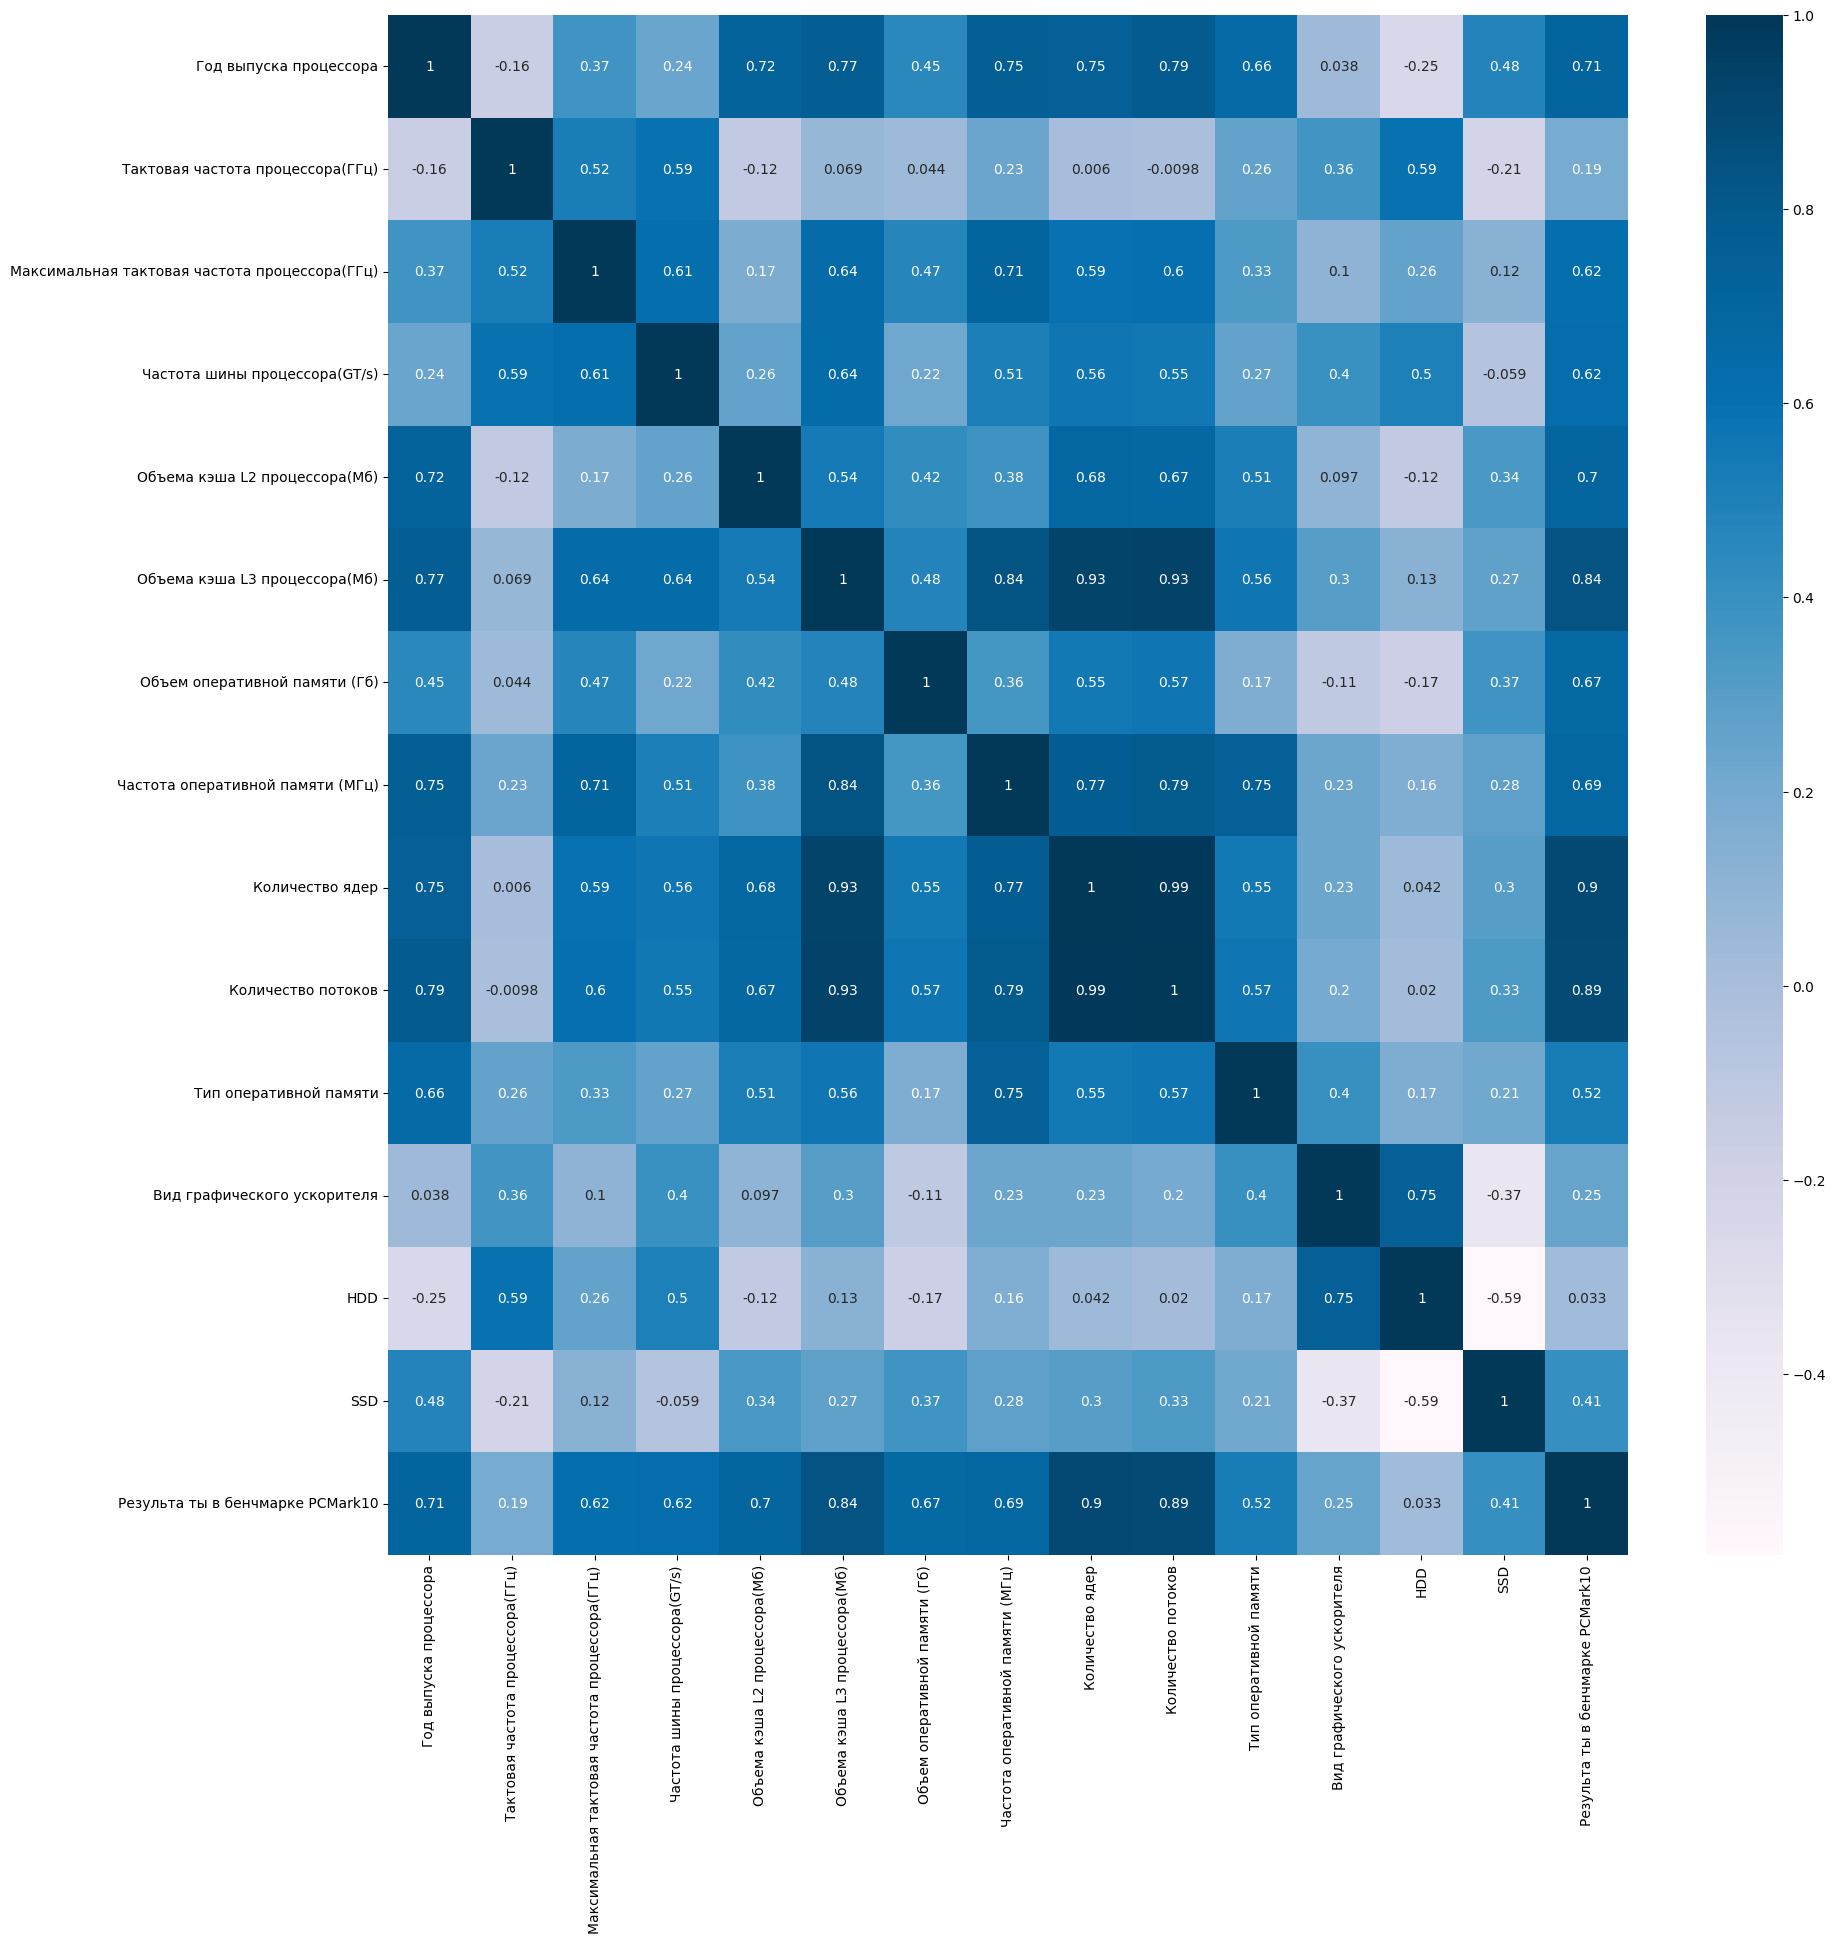

In [37]:
data
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap =plt.cm.PuBu)

In [38]:
def get_std_coefs(X, y):
    res = [0]
    X_z = sm.add_constant(X.select_dtypes(include=[np.number]).dropna().apply(stats.zscore))
    Y_z = pd.DataFrame(y).apply(stats.zscore)
    model = sm.OLS(Y_z, X_z).fit()
    res.extend(model.params.tolist())
    return pd.Series(res)

In [39]:
def get_pivot(df, model, param, label, num):
    pivot_test = pd.DataFrame()
    predictors = model.params.index.tolist()
    n = len(predictors)
    i = np.ones(n).astype(int) * num
    pivot_test['id'] = pd.Series(i)
    pivot_test['predictors'] = predictors
    pivot_test['b'] = model.params.tolist()
    pivot_test['std_err'] = model.bse.tolist()
    influence = model.get_influence()
    pivot_test['std coef'] = get_std_coefs(df[param], df[label])
    pivot_test['t'] = model.tvalues.tolist()
    pivot_test['lower interval'] = model.conf_int(alpha=0.05)[:][0].tolist()
    pivot_test['upper interval'] = model.conf_int(alpha=0.05)[:][1].tolist()
    return pivot_test.set_index('id')

In [40]:
label = 'Результа ты в бенчмарке PCMark10'

In [41]:
X_data = data.drop(label, axis=1)
Y_data = data.drop(X_data.columns, axis=1)

In [42]:
predictors = data.drop(label, axis=1).to_dict()
sorted_predictors = sorted(predictors, key=lambda x: abs(data[x].corr(data[label])), reverse=True)

In [43]:
sorted_predictors

['Количество ядер',
 'Количество потоков',
 'Объема кэша L3 процессора(Мб)',
 'Год выпуска процессора',
 'Объема кэша L2 процессора(Мб)',
 'Частота оперативной памяти (МГц)',
 'Объем оперативной памяти (Гб)',
 'Частота шины процессора(GT/s)',
 'Максимальная тактовая частота процессора(ГГц)',
 'Тип оперативной памяти',
 'SSD',
 'Вид графического ускорителя',
 'Тактовая частота процессора(ГГц)',
 'HDD']

In [44]:
pred_list = []
Y = data[label]
pivot_df = pd.DataFrame()
i = 1
for predictor in sorted_predictors:
    pred_list.append(predictor)
    X = sm.add_constant(data[pred_list])
    model = sm.OLS(Y, X).fit()
    F_crit = model.tvalues ** 2
    if F_crit[predictor] < 3.84:
        pred_list.pop()
    else:
        remove_list = list(F_crit[F_crit <= 2.71].index)
        for el in remove_list:
            if el in pred_list:
                pred_list.remove(el)
    if len(pred_list) != 0:
        model_info = get_pivot(data, model, pred_list, label, i)
        pivot_df = pd.concat([pivot_df, model_info], axis=0)
        i += 1

In [45]:
#Список названий предикторов, которые будут в модели
from select import select


current_features = []
ignore_features = [label]

for i in range(4):
    function_dict = {'predictor': [], 'r-squared':[]}
    for predictor in sorted_predictors:
        if predictor not in (current_features+ignore_features):
            selected_X = data[current_features + [predictor]]
            model = sm.OLS(Y, sm.add_constant(selected_X)).fit()
            F_crit = model.tvalues ** 2
            print(predictor, F_crit[predictor])
            if F_crit[predictor]>=3.84:
                #We add the predictor to our model
                #Now, we check if any other predictor's F is <2.71 and if so we drop em out
                remove_list = list(F_crit[F_crit <= 2.71].index)
                for el in remove_list:
                    if el in selected_X.columns:
                        selected_X.drop(el)
                model = sm.OLS(Y,sm.add_constant(selected_X)).fit()
                if len(model.params)>=3:
                    #Check the VIF
                    vif = pd.DataFrame()
                    vif["predictors"] = selected_X.columns
                    vif ["VIF values"] = [variance_inflation_factor(selected_X.values, i)
                    for i in range(len(selected_X.columns))]
                    if max(vif["VIF values"])<=10:
                        y_preds = model.predict(sm.add_constant(selected_X))
                        #Add the column name to our dictionary
                        function_dict['predictor'].append(predictor)
                        #Calculate the r-squared value between the target and predicted target
                        r2 = np.corrcoef(Y, y_preds)[0, 1]**2
                        #Add the r-squared value to our dictionary
                        function_dict['r-squared'].append(r2)
                else:
                    y_preds = model.predict(sm.add_constant(selected_X))
                    #Add the column name to our dictionary
                    function_dict['predictor'].append(predictor)
                    #Calculate the r-squared value between the target and predicted target
                    r2 = np.corrcoef(Y, y_preds)[0, 1]**2
                    #Add the r-squared value to our dictionary
                    function_dict['r-squared'].append(r2)
    if len(function_dict['predictor'])>0:
        #Once it's iterated through every column, turn our dict into a sorted DataFrame
        function_df = pd.DataFrame(function_dict).sort_values(by=['r-squared'],ascending = False)
        current_features.append(function_df["predictor"][0])
    if len(current_features)>0:
        model = sm.OLS(Y, sm.add_constant(data[current_features])).fit()
        #display(model.summary())
    #print(function_df)
print(current_features)
model = sm.OLS(Y, sm.add_constant(data[{"Количество ядер","Объем оперативной памяти (Гб)","Тактовая частота процессора(ГГц)","Объема кэша L2 процессора(Мб)"}])).fit()


Количество ядер 102.72136013744638
Количество потоков 98.54566362636862
Объема кэша L3 процессора(Мб) 59.671752270185635
Год выпуска процессора 26.03111969125644
Объема кэша L2 процессора(Мб) 24.162955107183233
Частота оперативной памяти (МГц) 22.444547806849762
Объем оперативной памяти (Гб) 20.35537535694728
Частота шины процессора(GT/s) 15.801542226336046
Максимальная тактовая частота процессора(ГГц) 15.634220994347023
Тип оперативной памяти 9.44056638529564
SSD 4.988974109695008
Вид графического ускорителя 1.6660070759770844
Тактовая частота процессора(ГГц) 0.9794471920458903
HDD 0.026852836030382164
Количество потоков 0.1846362921579692
Объема кэша L3 процессора(Мб) 0.07212595740731198
Год выпуска процессора 0.4581004987995964
Объема кэша L2 процессора(Мб) 2.08692263309467
Частота оперативной памяти (МГц) 0.006948920781409885
Объем оперативной памяти (Гб) 7.479142351722493
Частота шины процессора(GT/s) 2.88352209901291
Максимальная тактовая частота процессора(ГГц) 1.547393171463568

In [46]:
pivot_df

,predictors,b,std_err,std coef,t,lower interval,upper interval
id,,,,,,,
1,const,786.623239,211.523449,0.000000e+00,3.718847,350.982542,1222.263937
1,Количество ядер,626.653169,61.829660,5.898060e-17,10.135155,499.312600,753.993738
2,const,809.659091,221.640798,0.000000e+00,3.653024,352.214967,1267.103215
2,Количество ядер,439.806818,439.357094,5.898060e-17,1.001024,-466.981657,1346.595293
2,Количество потоков,90.863636,211.461631,8.968062e-01,0.429693,-345.571720,527.298993
3,const,780.909881,216.608767,0.000000e+00,3.605163,333.851358,1227.968404
3,Количество ядер,585.182068,166.779450,5.898060e-17,3.508718,240.966201,929.397934
3,Объема кэша L3 процессора(Мб),27.975755,104.168406,8.968062e-01,0.268563,-187.017268,242.968778
4,const,-83547.323317,124601.331056,0.000000e+00,-0.670517,-340711.831260,173617.184626


In [47]:
model.params

const                               -35.397215
Объема кэша L2 процессора(Мб)       388.915553
Тактовая частота процессора(ГГц)    371.629377
Объем оперативной памяти (Гб)       427.696496
Количество ядер                     445.951950
dtype: float64

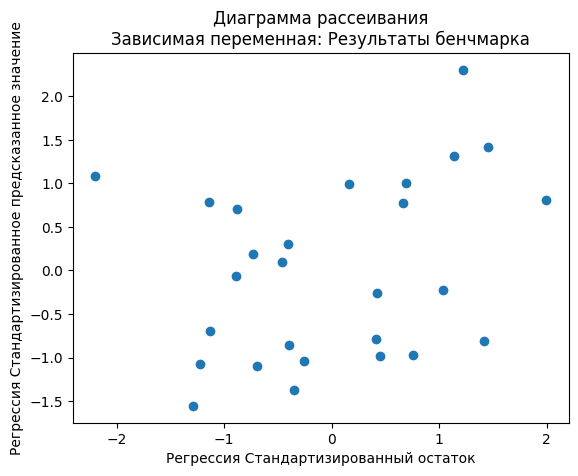

In [57]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
plt.scatter(standardized_residuals,pd.DataFrame(data[label]).apply(stats.zscore))
plt.title("Диаграмма рассеивания\nЗависимая переменная: Результаты бенчмарка")
plt.xlabel("Регрессия Стандартизированный остаток")
plt.ylabel("Регрессия Стандартизированное предсказанное значение")
None


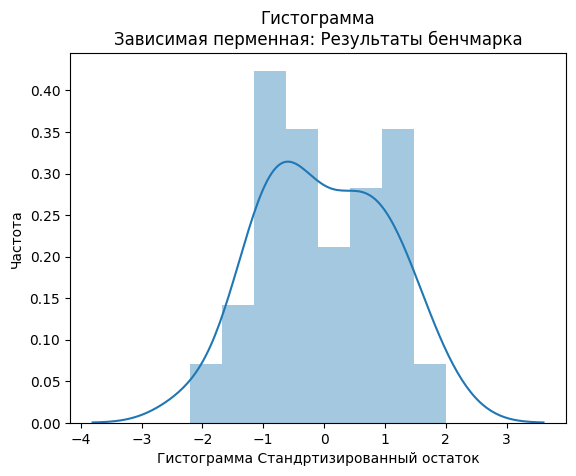

In [49]:
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal
plt.title("Гистограмма\nЗависимая перменная: Результаты бенчмарка")
plt.xlabel("Гистограмма Стандртизированный остаток")
plt.ylabel("Частота")

sns.distplot(standardized_residuals, bins = 8)
None


In [50]:
#F - test
print("Тест RESET Рамсея")
ram = sm.stats.diagnostic.linear_reset(model, power=2, use_f = True)
print(ram)
# R^2
print("\nR =",sqrt(model.rsquared))
print("R^2 = ",model.rsquared)
print("Cкорректированный R^2=",model.rsquared_adj)

print("\nF - статистика = ",model.fvalue)
f_crit = stats.f.ppf(q = ram.pvalue, dfn=ram.df_num,dfd = ram.df_denom)
print("F критическое =",f_crit)



Тест RESET Рамсея
<F test: F=0.005113392505885327, p=0.9436701200893195, df_denom=21, df_num=1>

R = 0.9497540555124779
R^2 =  0.902032765962399
Cкорректированный R^2= 0.8842205415919261

F - статистика =  50.641219602964746
F критическое = 4.080175991850006


In [51]:
if model.fvalue <f_crit:
    print("Так как F - статистика < критического значения (",f_crit,"), Модель не правильно специфицирована")
else:
    print("Так как F - статистика >= критического значения (",f_crit,"), Модель правильно специфицирована")
    # VIF
    vif = pd.DataFrame()
    vif["predictors"] = current_features
    vif ["VIF values"] = [variance_inflation_factor(data[current_features].values, i)
                          for i in range(len(data[current_features].columns))]
    print(vif)
    if max(vif["VIF values"])>=10:
        print("Присутствует мульиколлинеарность")
    else:
        print("Мультиколлинеарность не присутствует")
        dw = sm.stats.stattools.durbin_watson(model.resid)
        print("\nЗначение критерия Дурбина - Уотсона: ", dw)
        if abs(4 - dw) < abs(2 - dw):
            print("Отрицательная автокорреляция")
        elif dw < abs(2 - dw):
            print("Положительная автокорреляция")
        else:
            print("Остатки независимы")
            #print(model.summary())
            sh = shapiro(model.resid)
            print("\nЗначение критерия Шапиро", sh.statistic, "Значение коэффициента p", sh.pvalue)
            if sh.pvalue<0.05:
                print("Остатки не распределены нормально (p<0.05)")
            else:
                print("Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)")

Так как F - статистика >= критического значения ( 4.080175991850006 ), Модель правильно специфицирована
                         predictors  VIF values
0                   Количество ядер    9.449850
1     Объем оперативной памяти (Гб)    4.577701
2  Тактовая частота процессора(ГГц)    5.786623
3                               SSD    2.821076
Мультиколлинеарность не присутствует

Значение критерия Дурбина - Уотсона:  1.7454276062179792
Остатки независимы

Значение критерия Шапиро 0.9712312817573547 Значение коэффициента p 0.6346248388290405
Нет оснований отвергнуть гипотезу о том, что остатки распределены номрально  (p>=0.05)


In [52]:
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Результа ты в бенчмарке PCMark10   R-squared:                       0.902
Model:                                          OLS   Adj. R-squared:                  0.884
Method:                               Least Squares   F-statistic:                     50.64
Date:                              Wed, 07 Sep 2022   Prob (F-statistic):           8.71e-11
Time:                                      12:14:28   Log-Likelihood:                -189.77
No. Observations:                                27   AIC:                             389.5
Df Residuals:                                    22   BIC:                             396.0
Df Model:                                         4                                         
Covariance Type:                          nonrobust                                         
                                       coef    std err          t     

In [54]:
model.params

const                               -35.397215
Объема кэша L2 процессора(Мб)       388.915553
Тактовая частота процессора(ГГц)    371.629377
Объем оперативной памяти (Гб)       427.696496
Количество ядер                     445.951950
dtype: float64